In [6]:
library("ggplot2")
library("dplyr")
library("reshape")
library("tidyr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename



Attaching package: ‘tidyr’


The following objects are masked from ‘package:reshape’:

    expand, smiths




In [7]:
load("~/acc/df.RData")

In [8]:
data <- df

In [9]:
head(data)

,local,cod_mun,time,anom,COMPETEN,ano,mes,nome_mun,n_nascimentos,tmn,tmn_pre,tmn_tar,partos_ces,esc_mae,idade_mae,semanas_gestacao,n_consultas,nome_rg
,<dbl>,<dbl>,<date>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,12505,330330,2006-01-01,FALSE,200601,2006,01,Niterói,91,21.97802,10.989011,10.989011,0.5274725,0.5824176,0.08791209,0.2307692,0.3076923,Leste Metropolitano
2,12505,330330,2006-02-01,FALSE,200602,2006,02,Niterói,111,18.01802,9.009009,9.009009,0.5675676,0.3333333,0.09909910,0.1981982,0.4864865,Leste Metropolitano
3,12505,330330,2006-03-01,FALSE,200603,2006,03,Niterói,118,16.94915,0.000000,16.949153,0.4576271,0.3389831,0.07627119,0.3050847,0.5593220,Leste Metropolitano
4,12505,330330,2006-04-01,FALSE,200604,2006,04,Niterói,116,25.86207,17.241379,8.620690,0.4913793,0.3879310,0.07758621,0.2155172,0.5344828,Leste Metropolitano
5,12505,330330,2006-05-01,FALSE,200605,2006,05,Niterói,157,19.10828,12.738854,6.369427,0.4713376,0.2738854,0.10191083,0.1656051,0.4394904,Leste Metropolitano
6,12505,330330,2006-06-01,FALSE,200606,2006,06,Niterói,154,0.00000,0.000000,0.000000,0.4675325,0.4935065,0.11688312,0.1818182,0.4675325,Leste Metropolitano


### Figure 2

In [10]:
c1 <- subset(data, local=="2708353", select=c(time, tmn))
names(c1) <- c("time", "IFF FIOCRUZ (2708353)")
c2 <- subset(data, local=="3567486", select=c(time, tmn))
names(c2) <- c("time", "DAVID CAPISTRANO FILHO BIRTH CENTER (3567486)")
c3 <- subset(data, local=="2298120", select=c(time, tmn))
names(c3) <- c("time", "ALBERT SCHWEITZER MUNICIPAL HOSPITAL (2298120)")

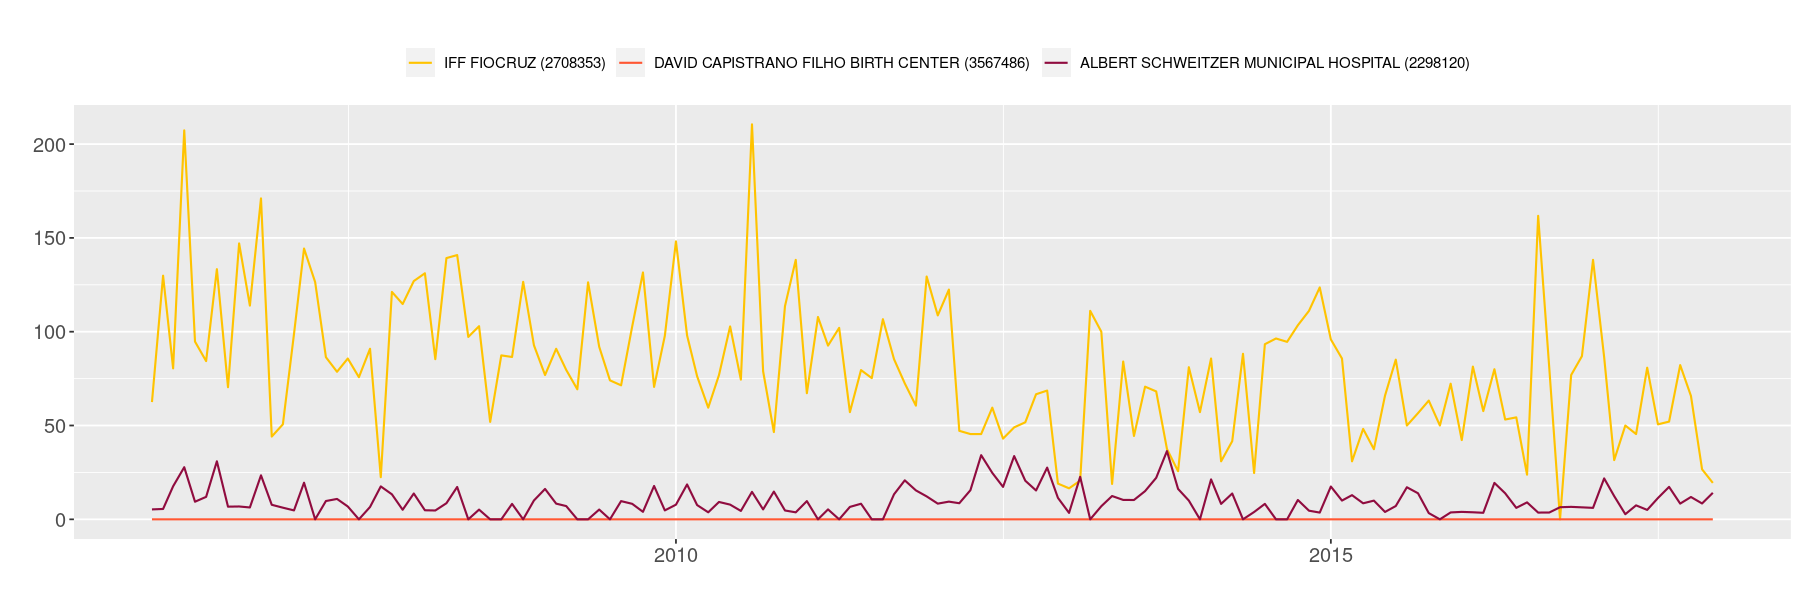

In [14]:
df <- merge(merge(
  c1,
  c2, by = "time", all=TRUE),
  c3, by = "time", all=TRUE)
df_melt <- melt(df, id=c("time"))


p <- ggplot(df_melt, aes(x = time, y = value)) + 
  geom_line(aes(color = variable), size = .6) +
  scale_color_manual(values = c("#FFC300", "#FF5733", "#900C3F")) +
        labs(title = "", x = "", y = "") +
        theme(axis.text = element_text(size = 12), legend.text = element_text(size = 9),
              legend.title = element_blank(), legend.position="top")

options(repr.plot.width=15, repr.plot.height=5)
p

### Figure 3

In [15]:
#subset AI
anom <- subset(data, anom==TRUE)

In [16]:
ff <- subset(anom, select=c(local, nome_rg))
ff <- unique(ff)
ff <- ff[order(ff$nome_rg),]
ord <- ff$local

anom$local <- factor(anom$local, levels = ord)

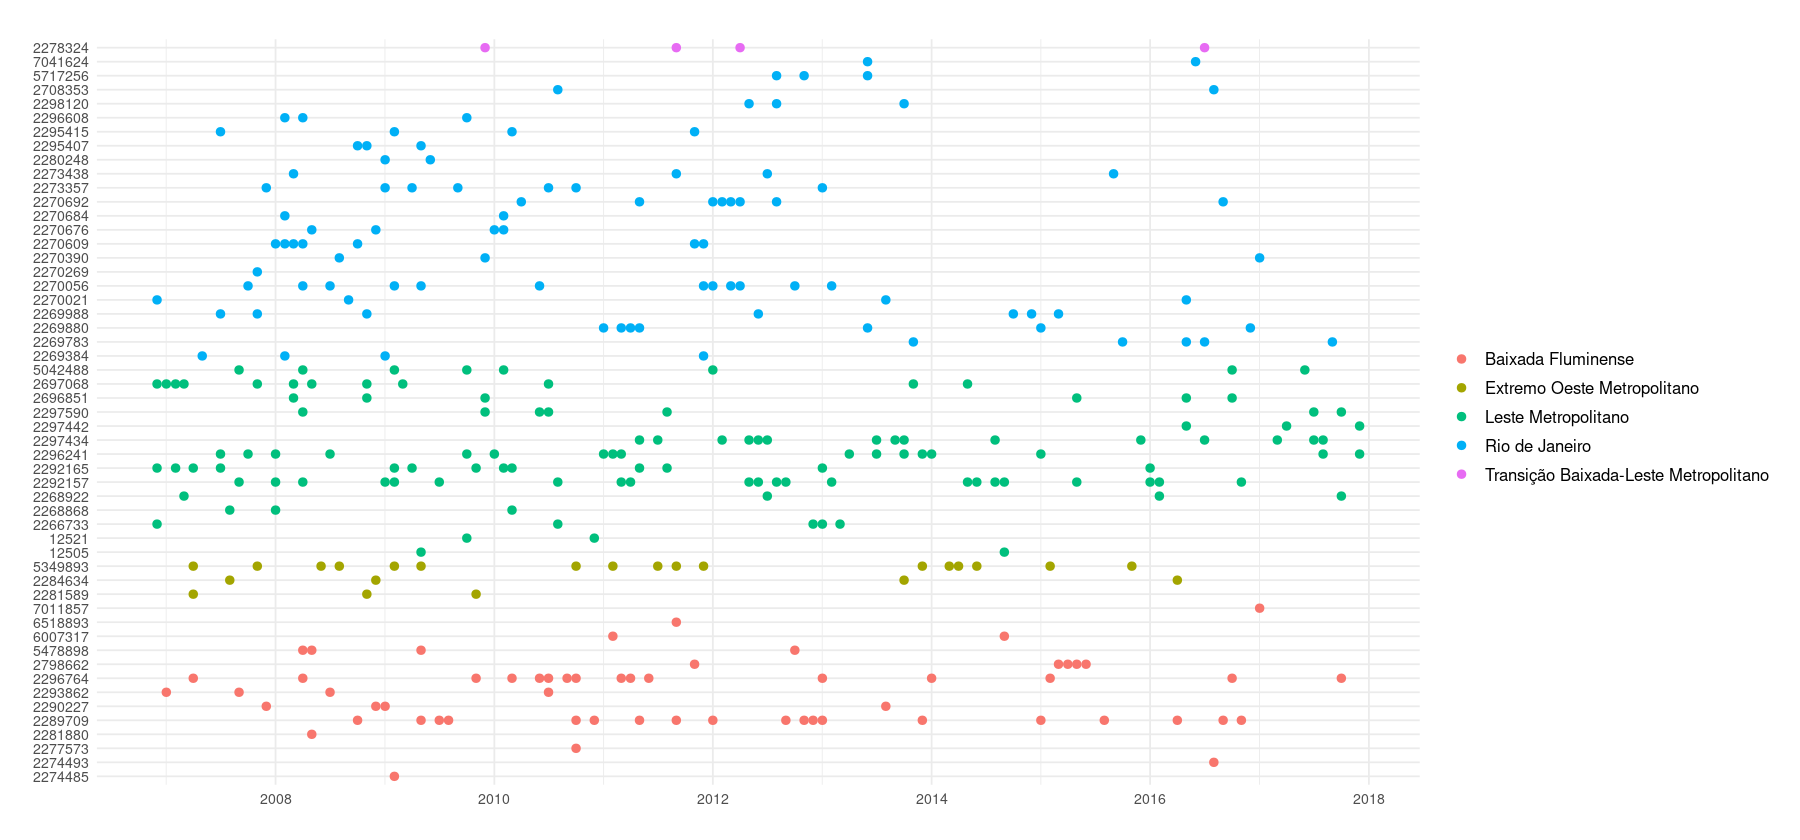

In [17]:
#Plot of anomalies by zone of the metropolitan region of Rio de Janeiro over time
p <- ggplot(anom, 
        aes(x= time, y = local, color=nome_rg)) +
        labs(title = "", x = "", y = "") +
        theme_minimal() +
        theme(axis.text = element_text(size = 8.5), legend.text = element_text(size = 10),
        legend.title = element_blank()) +
        geom_point(size=2)

options(repr.plot.width=15, repr.plot.height=7)
p

## Categorization

In [18]:
data <- subset(data, select=c(local,COMPETEN,tmn,tmn_pre,tmn_tar,idade_mae,semanas_gestacao,
                    n_consultas,partos_ces,n_nascimentos,esc_mae,anom))

N <- 3

df_Ncat <- data %>%
  group_by(local) %>%
  mutate(cat_idade_mae = ntile(idade_mae, N)) %>%
  mutate(cat_semanas_gestacao = ntile(semanas_gestacao, N)) %>%
  mutate(cat_consultas = ntile(n_consultas, N)) %>%
  mutate(cat_partos_ces = ntile(partos_ces, N)) %>%
  mutate(cat_nascimentos = ntile(n_nascimentos, N)) %>%
  mutate(cat_esc_mae = ntile(esc_mae, N))


In [19]:
head(df_Ncat)
table(df_Ncat$cat_semanas_gestacao)

local,COMPETEN,tmn,tmn_pre,tmn_tar,idade_mae,semanas_gestacao,n_consultas,partos_ces,n_nascimentos,esc_mae,anom,cat_idade_mae,cat_semanas_gestacao,cat_consultas,cat_partos_ces,cat_nascimentos,cat_esc_mae
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<int>,<int>,<int>,<int>,<int>
12505,200601,21.97802,10.989011,10.989011,0.08791209,0.2307692,0.3076923,0.5274725,91,0.5824176,FALSE,1,2,1,1,3,3
12505,200602,18.01802,9.009009,9.009009,0.09909910,0.1981982,0.4864865,0.5675676,111,0.3333333,FALSE,1,1,3,1,3,2
12505,200603,16.94915,0.000000,16.949153,0.07627119,0.3050847,0.5593220,0.4576271,118,0.3389831,FALSE,1,3,3,1,3,3
12505,200604,25.86207,17.241379,8.620690,0.07758621,0.2155172,0.5344828,0.4913793,116,0.3879310,FALSE,1,1,3,1,3,3
12505,200605,19.10828,12.738854,6.369427,0.10191083,0.1656051,0.4394904,0.4713376,157,0.2738854,FALSE,1,1,2,1,3,2
12505,200606,0.00000,0.000000,0.000000,0.11688312,0.1818182,0.4675325,0.4675325,154,0.4935065,FALSE,2,1,3,1,3,3



   1    2    3 
2366 2352 2338 

## Determination of associations

In [20]:
anom <- subset(df_Ncat, anom==TRUE)

In [21]:
casos <- count(anom, "local")
casos <- casos$n                  #number of anomalies in each hospital

In [22]:
df <- expand(anom, cat_semanas_gestacao = 1:3) #completing with missing category by hospital
f <- anom %>% group_by(local, cat_semanas_gestacao) %>% tally() #counting how many there are per category
d <- left_join(df, f, by = c('local', 'cat_semanas_gestacao')) #joining and filling with 0 what was not there
d[is.na(d)] <- 0

In [23]:
#number of cases in each class
casos_cat1 <- subset(d, cat_semanas_gestacao==1)
casos_cat1 <- casos_cat1$n

casos_cat2 <- subset(d, cat_semanas_gestacao==2)
casos_cat2 <- casos_cat2$n

casos_cat3 <- subset(d, cat_semanas_gestacao==3)
casos_cat3 <- casos_cat3$n

In [24]:
#percentage of cases in each class
casos_cat1_perc <- casos_cat1 / casos
casos_cat2_perc <- casos_cat2 / casos
casos_cat3_perc <- casos_cat3 / casos

In [13]:
perccasos <- c(casos_cat1_perc, casos_cat2_perc, casos_cat3_perc)

In [25]:
c1 <- t.test(casos_cat1_perc, mu=0.33)
c2 <- t.test(casos_cat2_perc, mu=0.33)
c3 <- t.test(casos_cat3_perc, mu=0.33)
n <- length(casos_cat1_perc)

In [26]:
c_mean <- as.numeric(c(c1[5], c2[5], c3[5]))
c_mean

[1] 0.2533785 0.3462889 0.4003326

In [27]:
table <- data.frame(matrix(ncol=2, nrow=3*length(casos_cat1_perc)))
table[1:n,1] <- casos_cat1_perc
table[1:n,2] <- 1
table[(n+1):(2*n),1] <- casos_cat2_perc
table[(n+1):(2*n),2] <- 2
table[((2*n)+1):(3*n),1] <- casos_cat3_perc
table[((2*n)+1):(3*n),2] <- 3

Warning message:
“The dot-dot notation (`..y..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(y)` instead.”


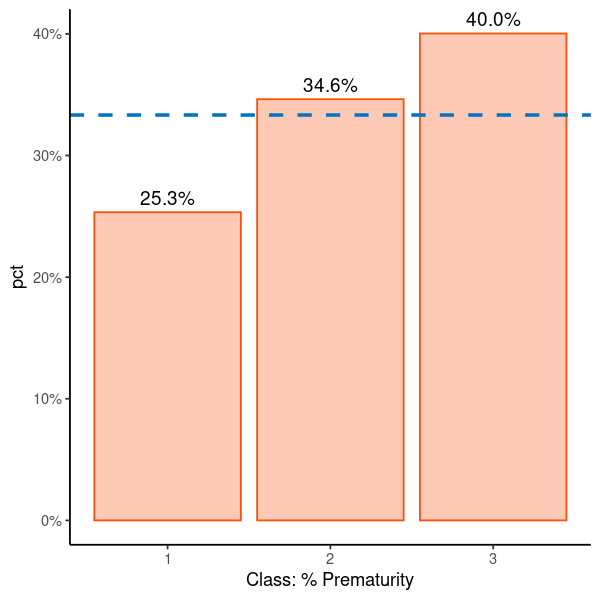

In [28]:
#Plot
options(repr.plot.width=5, repr.plot.height=5)

ggplot(data=table, aes(x=factor(X2), y=X1,
                       label = scales::percent(X1))) + 
  geom_bar(position = "dodge", stat = "summary", fun = "mean",
           color="#FC4E07", fill="#FC4E07", alpha=0.3) + 
  geom_text(aes(label=scales::percent(..y..)),
            stat = 'summary', fun = "mean", position = position_dodge(.9), 
            vjust = -0.5, size = 4) + 
  labs(x = 'Class: % Prematurity', y = 'pct', fill = 'classe') +
  scale_y_continuous(labels = scales::percent) +
  geom_hline(yintercept=.3333, linetype='dashed', color="#0073C2FF", size=1) +
  theme_classic()

### T-test

In [29]:
c1 <- t.test(casos_cat1_perc, mu=0.33)
c2 <- t.test(casos_cat2_perc, mu=0.33)
c3 <- t.test(casos_cat3_perc, mu=0.33)

In [30]:
c1[3]
c2[3]
c3[3]

$p.value
[1] 0.02103451

$p.value
[1] 0.659873

$p.value
[1] 0.08662179

## Validation

### A random HD is created (with equal distribution between the classes), and the t-test is carried out within the set of interest

In [31]:
tablemedias <- data.frame(matrix(ncol = 1000, nrow = 3))
tablepvalue <- data.frame(matrix(ncol = 1000, nrow = 3))

In [32]:
dado <- data
set.seed(1234)

for(i in 1:1000) {
    #creating random variable
    w <- c(rep("baixo",0.33334*7056),rep("medio",0.33334*7056),rep("alto",0.33334*7056))
    # cheating    
    x <- sample(w)

    dado$teste <- x
    anom <- subset(dado, anom==T)

    #creating dataset for t-test
    df <- subset(dado, select=c(local,COMPETEN,tmn,tmn_pre,tmn_tar,idade_mae,semanas_gestacao,
                                n_consultas,partos_ces,n_nascimentos,esc_mae,anom,teste))

    df_3cat_t <- df %>%
      group_by(local) %>%
      mutate(teste = ntile(teste, 3))

    #t-test
    dado <- df_3cat_t

    anom <- subset(dado, anom==T)

    casos <- count(anom, "local")
    casos <- casos$n

    df <- expand(anom, teste = 1:3)
    f <- anom %>% group_by(local, teste) %>% tally()
    d <- left_join(df, f, by = c('local', 'teste'))
    d[is.na(d)] <- 0

    casos_cat1 <- subset(d, teste==1)
    casos_cat1 <- casos_cat1$n

    casos_cat2 <- subset(d, teste==2)
    casos_cat2 <- casos_cat2$n

    casos_cat3 <- subset(d, teste==3)
    casos_cat3 <- casos_cat3$n

    casos_cat1_perc <- casos_cat1 / casos
    casos_cat2_perc <- casos_cat2 / casos
    casos_cat3_perc <- casos_cat3 / casos

    a1 <- t.test(casos_cat1_perc, mu=0.33)
    a2 <- t.test(casos_cat2_perc, mu=0.33)
    a3 <- t.test(casos_cat3_perc, mu=0.33)

    pvalue <- as.numeric(c(a1[3], a2[3], a3[3]))

    tablepvalue[,i] <- pvalue
}

In [33]:
#percentage that refutes the hypothesis
class1 <- tablepvalue[1,]
length(class1[class1<0.05])/1000

class2 <- tablepvalue[2,]
length(class2[class2<0.05])/1000

class3 <- tablepvalue[3,]
length(class3[class3<0.05])/1000

[1] 0.057

[1] 0.048

[1] 0.054

### A HD of the study is used in random samples of the same size as the set of interest

In [34]:
tablemedias <- data.frame(matrix(ncol = 1000, nrow = 3))
tablepvalue <- data.frame(matrix(ncol = 1000, nrow = 3))

In [35]:
load("~/acc/df_3cat.RData")

In [36]:
dado <- data
set.seed(1234)

for(i in 1:1000) {
  anom <-  dado[sample(nrow(dado), 304), ] #random sample
  
  #T-test
  casos <- count(anom, "local")
  casos <- casos$n             
  
  df <- expand(anom, cat_nascimentos = 1:3)
  f <- anom %>% group_by(local, cat_nascimentos) %>% tally()
  d <- left_join(df, f, by = c('local', 'cat_nascimentos'))
  d[is.na(d)] <- 0
  
  casos_cat1 <- subset(d, cat_nascimentos==1)
  casos_cat1 <- casos_cat1$n
  
  casos_cat2 <- subset(d, cat_nascimentos==2)
  casos_cat2 <- casos_cat2$n
  
  casos_cat3 <- subset(d, cat_nascimentos==3)
  casos_cat3 <- casos_cat3$n
  
  casos_cat1_perc <- casos_cat1 / casos
  casos_cat2_perc <- casos_cat2 / casos
  casos_cat3_perc <- casos_cat3 / casos
  
  a1 <- t.test(casos_cat1_perc, mu=0.33)
  a2 <- t.test(casos_cat2_perc, mu=0.33)
  a3 <- t.test(casos_cat3_perc, mu=0.33)
  
  pvalue <- as.numeric(c(a1[3], a2[3], a3[3]))
  
  tablepvalue[,i] <- pvalue
}

In [37]:
#percentage that refutes the hypothesis
class1 <- tablepvalue[1,]
length(class1[class1<0.05])/1000

class2 <- tablepvalue[2,]
length(class2[class2<0.05])/1000

class3 <- tablepvalue[3,]
length(class3[class3<0.05])/1000

[1] 0.048

[1] 0.038

[1] 0.04